In [42]:
from nufeb_tools import utils,plot
import numpy as np
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1 import AxesGrid,axes_divider,make_axes_locatable
from matplotlib.ticker import FormatStrFormatter
#import tables

In [9]:

x = utils.get_data(test=True)


In [10]:
x.nutrients

['co2', 'o2', 'sub', 'suc']

In [11]:
grid = x.grid
# Nutrient grid array, timepoint, nutrient, z,x,y
grid.shape

(101, 4, 5, 50, 50)

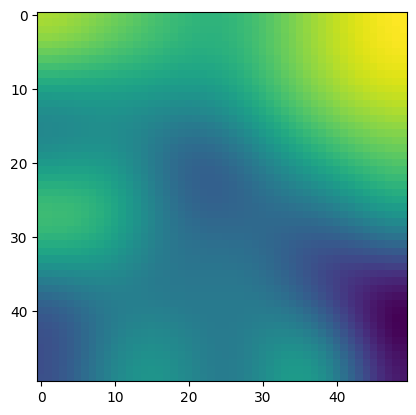

In [12]:
plt.imshow(grid[100,3,1,:,:])
plt.show()

Assigning ancestry: 100%|██████████| 100/100 [00:02<00:00, 37.13it/s]


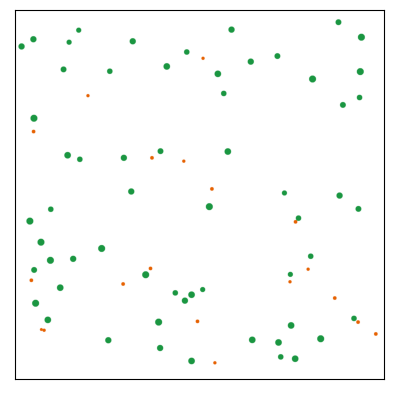

In [13]:
plot.colony(x,100,by='species')
plt.show()

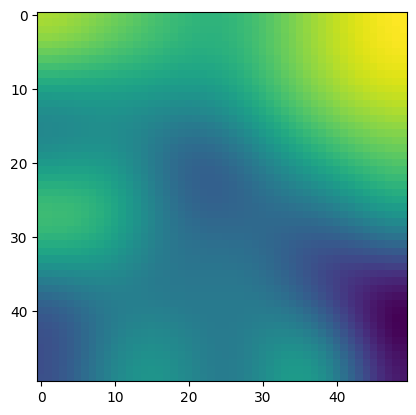

In [14]:


obj = x
df = obj.colonies.copy()
colors = {1 : (26,150,65) ,2 : (230,97,1)}
dims=obj.metadata['Dimensions']
tp = df[df.Timestep == 100]
circles = [Circle((round(x_/dims[0]*obj.grid.shape[3]),
            round(y_/dims[1]*obj.grid.shape[4])),round(radius/dims[1]*(obj.grid.shape[3]+obj.grid.shape[4])/2),
            ) for x_,y_, radius,type_ in zip(tp.x,tp.y,tp.radius,tp.type)]






patches=[]
f,ax = plt.subplots()
ax.imshow(grid[100,3,1,:,:])
for circle in circles:
    
#circle = Circle((.5, .5), .5)
    ax.add_patch(circle)

plt.show()

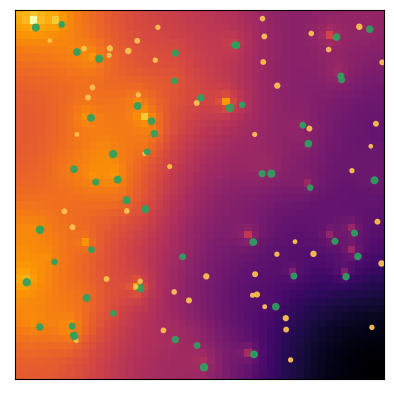

In [32]:
tp = df[df.Timestep == 0].reset_index()

f,ax = plt.subplots()
ax.imshow(grid[1,3,1,:,:],cmap='inferno')
#colors=['g','r']
colors=['#2ca25f','#fec44f']
for x_,y_, radius,type_ in zip(tp.x,tp.y,tp.radius,tp.type):
    xx = x_/dims[0]*obj.grid.shape[3]
    yy= y_/dims[1]*obj.grid.shape[4]
    r = radius/dims[1]*(obj.grid.shape[3]+obj.grid.shape[4])/2    
    circle = Circle((xx, yy), r,color = colors[type_-1],alpha=0.9)
    ax.add_patch(circle)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

In [16]:
x = utils.get_data(directory=r'D:\runs\Run_55_52_78_1_2021-09-15_30661')

Assigning ancestry: 100%|██████████| 350/350 [00:46<00:00,  7.54it/s]


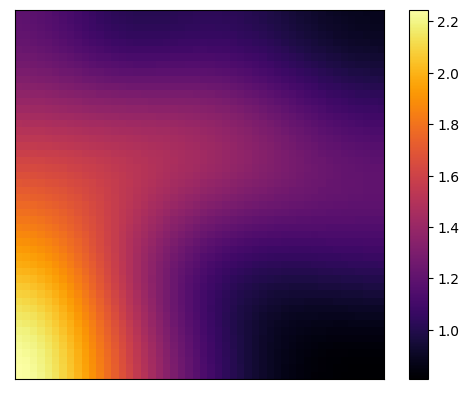

In [17]:
obj = x
if not hasattr(obj,'colonies'):
    obj.get_mothers()
df = obj.colonies.copy()
colors = {1 : (26,150,65) ,2 : (230,97,1)}
dims=obj.metadata['Dimensions']
time = 30000
tp = df[df.Timestep == time]
grid = x.grid
f,ax = plt.subplots()
it = list(df.Timestep.unique()).index(time)
im = ax.imshow(grid[it,3,1,:,:],cmap='inferno')
#colors=['g','r']
colors=['#2ca25f','#fec44f']
#for x_,y_, radius,type_ in zip(tp.x,tp.y,tp.radius,tp.type):
  #  xx = x_/dims[0]*obj.grid.shape[3]
  #  yy= y_/dims[1]*obj.grid.shape[4]
  #  r = radius/dims[1]*(obj.grid.shape[3]+obj.grid.shape[4])/2    
  #  circle = Circle((xx, yy), r,color = colors[type_-1],alpha=0.9)
  #  ax.add_patch(circle)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
f.colorbar(im, ax=ax)
plt.show()

In [18]:
df.Timestep.unique()[299]

29900

In [19]:
suc = grid[:,3,:,:,:]
suc = np.mean(suc,axis=1)
suc_mean = np.mean(suc,axis=(1,2))
suc_min = np.min(suc,axis=(1,2))
suc_max = np.max(suc,axis=(1,2))
suc_r = suc_max/suc_min


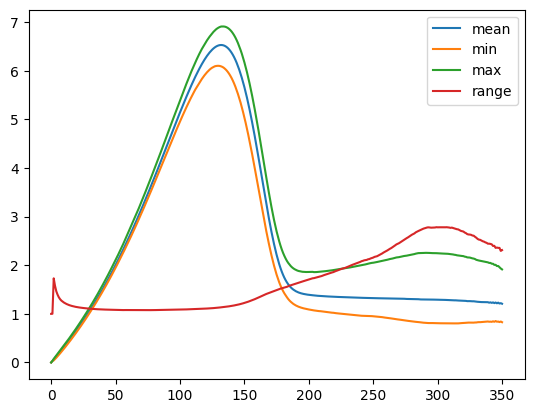

In [20]:
plt.plot(suc_mean,label='mean')
plt.plot(suc_min,label='min')
plt.plot(suc_max,label='max')
plt.plot(suc_r,label='range')
plt.legend()
plt.show()

In [21]:
suc.shape

(351, 50, 50)

In [22]:
np.argmax(suc_r)

299

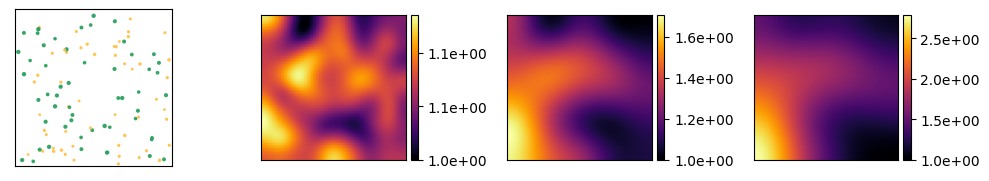

In [58]:
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    cax.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
    plt.sca(last_axes)
    return cbar

tp = df[df.Timestep == 0]
grid = x.grid
f,axes = plt.subplots(ncols=4,figsize=(10,4))
it = list(df.Timestep.unique()).index(time)
times = [np.argmax(suc_mean),200,np.argmax(suc_r)]

for ax,t in zip(axes.ravel()[1:],times):
  s = np.mean(grid[t,3,:,:,:],axis=0)
  im = ax.imshow(s/s.min(),cmap='inferno')
  colorbar(im)

#colors=['g','r']
colors=['#2ca25f','#fec44f']
for x_,y_, radius,type_ in zip(tp.x,tp.y,tp.radius,tp.type):
    xx = x_/dims[0]*obj.grid.shape[3]
    yy= y_/dims[1]*obj.grid.shape[4]
    r = radius/dims[1]*(obj.grid.shape[3]+obj.grid.shape[4])/2    
    circle = Circle((xx, yy), r,color = colors[type_-1],alpha=0.9)
    axes[0].add_patch(circle)
axes[0].set_xlim(0,50)
axes[0].set_ylim(0,50)
axes[0].set_aspect('equal')
for ax in axes.ravel():
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
f.tight_layout()
plt.show()

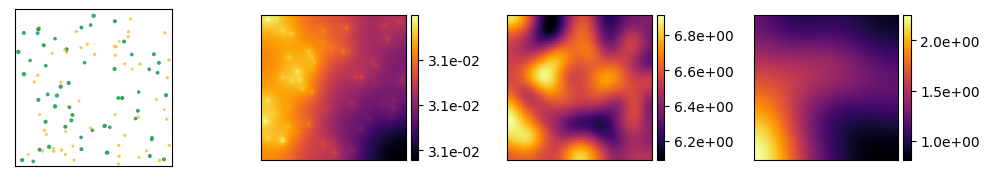

In [57]:
tp = df[df.Timestep == 0]
grid = x.grid
f,axes = plt.subplots(ncols=4,figsize=(10,4))
it = list(df.Timestep.unique()).index(time)
times = [1,np.argmax(suc_mean),np.argmax(suc_r)]

for ax,t in zip(axes.ravel()[1:],times):
  s = np.mean(grid[t,3,:,:,:],axis=0)
  im = ax.imshow(s,cmap='inferno')
  colorbar(im)

#colors=['g','r']
colors=['#2ca25f','#fec44f']
for x_,y_, radius,type_ in zip(tp.x,tp.y,tp.radius,tp.type):
    xx = x_/dims[0]*obj.grid.shape[3]
    yy= y_/dims[1]*obj.grid.shape[4]
    r = radius/dims[1]*(obj.grid.shape[3]+obj.grid.shape[4])/2    
    circle = Circle((xx, yy), r,color = colors[type_-1],alpha=0.9)
    axes[0].add_patch(circle)
axes[0].set_xlim(0,50)
axes[0].set_ylim(0,50)
axes[0].set_aspect('equal')
for ax in axes.ravel():
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
f.tight_layout()
plt.show()

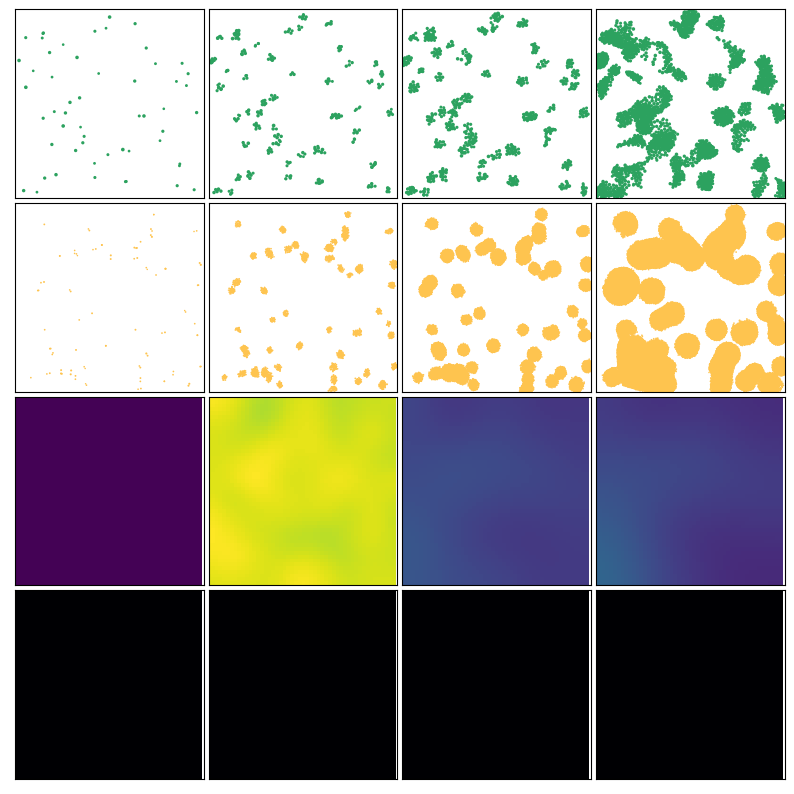

In [53]:
def plot_cells(obj,type_,t,ax):
    obj = x
    if not hasattr(obj,'colonies'):
        obj.get_mothers()
    df = obj.colonies.copy()
    colors=['#2ca25f','#fec44f']
    dims=obj.metadata['Dimensions']
    tp = df[(df.Timestep==df.Timestep.unique()[t]) & (df.type==type_)]
    circles = [Circle((x_/dims[0]*obj.grid.shape[3], y_/dims[1]*obj.grid.shape[4]), radius/dims[1]*(obj.grid.shape[3]+obj.grid.shape[4])/2 ,color = colors[type_-1],alpha=0.9) for x_,y_, radius in zip(tp.x,tp.y,tp.radius)]
    coll = PatchCollection(circles,facecolors=colors[type_-1])
    ax.add_collection(coll)
    ax.set_xlim(0,obj.grid.shape[3])
    ax.set_ylim(0,obj.grid.shape[4])
    ax.set_aspect('equal')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    return
df = x.colonies.copy()
dims=x.metadata['Dimensions']
grid = x.grid
suc = grid[:,3,:,:,:]
suc = np.mean(suc,axis=1)
suc_mean = np.mean(suc,axis=(1,2))
suc_min = np.min(suc,axis=(1,2))
suc_max = np.max(suc,axis=(1,2))
suc_r = suc_max/suc_min

#f,axes = plt.subplots(nrows=4,ncols=4,figsize=(10,10))
fig = plt.figure(figsize=(10,10))
gr = AxesGrid(fig, 111,
                nrows_ncols=(4,4),
                axes_pad=0.05,
                cbar_mode='none',
                cbar_location='right',
                cbar_pad=0.05,
                cbar_size='4%'
                )
times = [1,np.argmax(suc_mean),200,np.argmax(suc_r)]

# cbar.ax.yaxis.set_ticks([0,.25,.5,.75,1])
n=0
for t in times:
    plot_cells(x,1,t,gr[n])
    n=n+1
for t in times:
    plot_cells(x,2,t,gr[n])
    n=n+1
for t in times:
    s = np.mean(grid[t,3,:,:,:],axis=0)
    im = gr[n].imshow(s,vmin=0,vmax=np.max(np.mean(grid[:,3,:,:,:],axis=1)))
    n=n+1
for t in times:
    s = np.mean(grid[t,3,:,:,:],axis=0)
    im2 = gr[n].imshow(s/s.min(),cmap='inferno',vmin=0,vmax=np.max(np.mean(grid[:,3,:,:,:],axis=1)/np.min(np.mean(grid[:,3,:,:,:],axis=1))))
    n=n+1
for ax in gr:
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
#divider = axes_divider.make_axes_locatable(gr[11])
#axcb = divider.append_axes("right", size=1.2, pad=0.05)
#colorbar(axcb)
#cbar = gr.cbar_axes[0].colorbar(im)
#cbar.ax.set_ylabel('Mean intensity',fontsize=6)
#cbar.ax.yaxis.set_tick_params(labelsize=5)
plt.show()

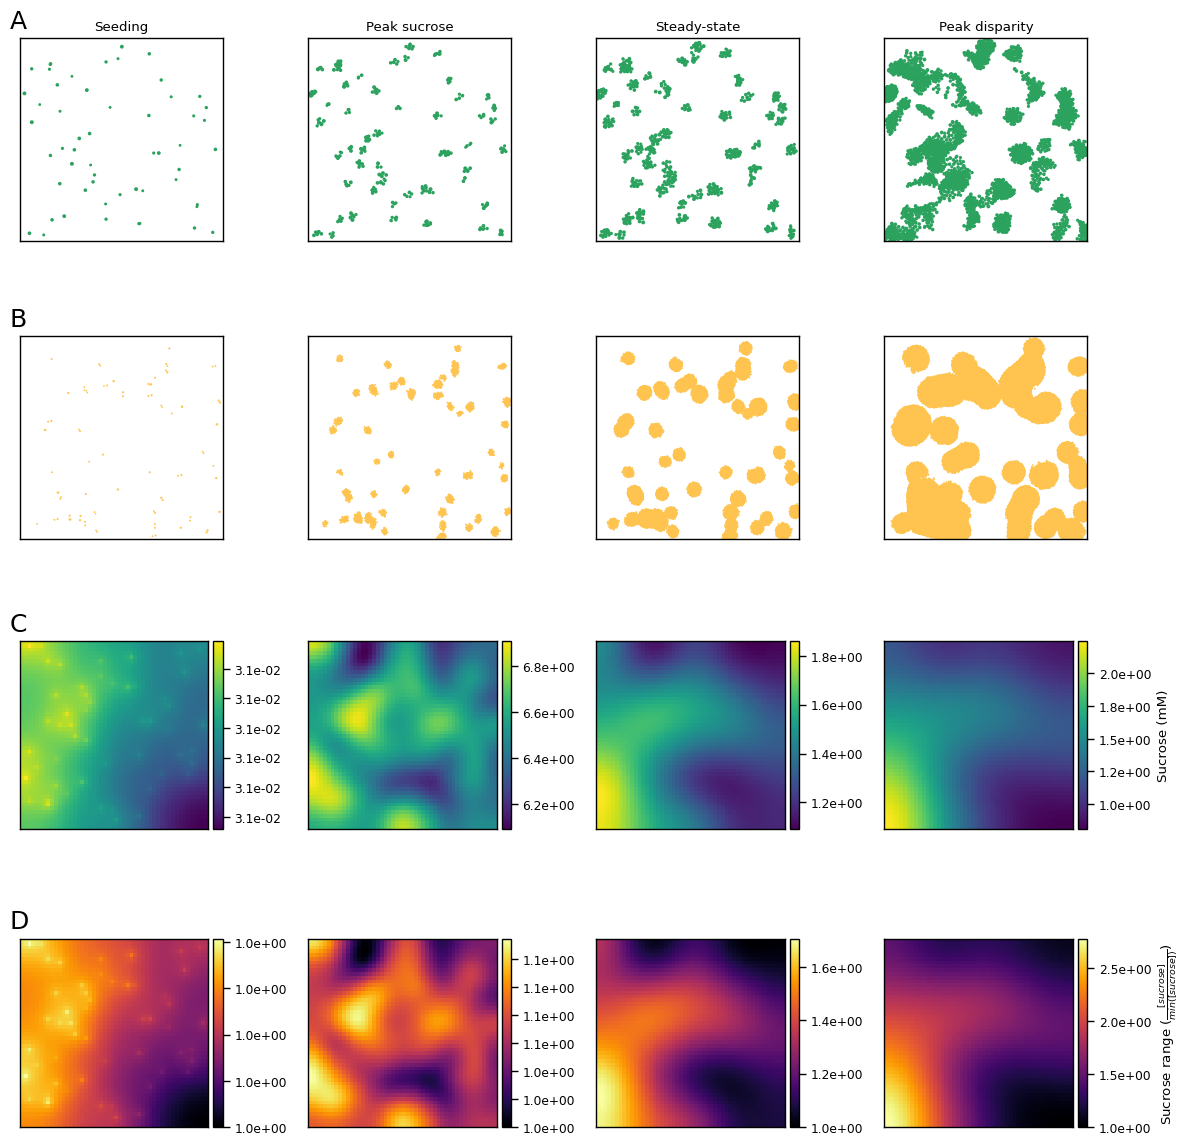

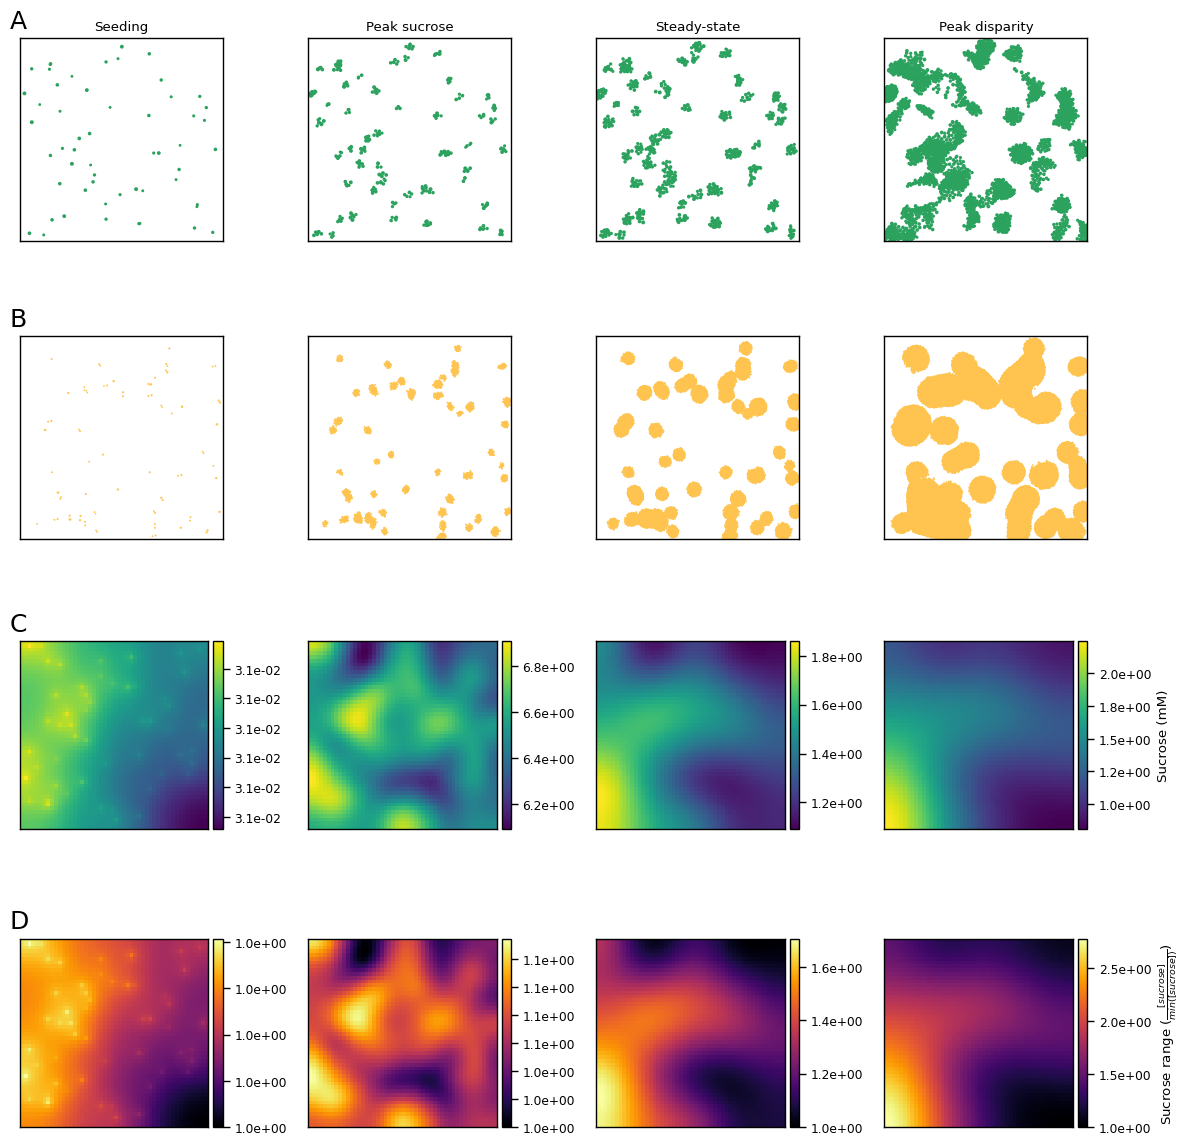

In [64]:
from matplotlib import transforms
import string
sns.set_context('paper')
def label_panel(ax, letter, *,
                offset_left=0.1, offset_up=0.1, prefix='', postfix='', **font_kwds):
    kwds = dict(fontsize=18)
    kwds.update(font_kwds)
    # this mad looking bit of code says that we should put the code offset a certain distance in
    # inches (using the fig.dpi_scale_trans transformation) from the top left of the frame
    # (which is (0, 1) in ax.transAxes transformation space)
    fig = ax.figure
    trans = ax.transAxes + transforms.ScaledTranslation(-offset_left, offset_up, fig.dpi_scale_trans)
    ax.text(0, 1, prefix+letter+postfix, transform=trans, **kwds)

def label_panels(axes, letters=None, **kwds):
    if letters is None:
        letters=string.ascii_uppercase[0:len(axes)]
        
    for ax,letter in zip(axes,letters):
        label_panel(ax, letter, **kwds)

times = [1,np.argmax(suc_mean),200,np.argmax(suc_r)]
dims=x.metadata['Dimensions']
grid = x.grid
suc = grid[:,3,:,:,:]
suc = np.mean(suc,axis=1)
suc_mean = np.mean(suc,axis=(1,2))
suc_min = np.min(suc,axis=(1,2))
suc_max = np.max(suc,axis=(1,2))
suc_r = suc_max/suc_min
f,axes=plt.subplots(nrows=4,ncols=4,figsize=(12,12))
for ax,t in zip(axes[0,:].ravel(),times):
    plot_cells(x,1,t,ax)
for ax,t in zip(axes[1,:].ravel(),times):
    plot_cells(x,2,t,ax)
for ax,t in zip(axes[2,:].ravel(),times):
    s = np.mean(grid[t,3,:,:,:],axis=0)
    im = ax.imshow(s)#vmin=0,vmax=np.max(np.mean(grid[:,3,:,:,:],axis=1))
    cb1 = colorbar(im)
    
smax =0
smin= 0
for t in times:
    s = np.mean(grid[t,3,:,:,:],axis=0)
    sm = np.max(s/s.min())
    sm2 = np.min(s/s.min())
    if sm > smax:
        smax = sm
    if sm2 > smin:
        smin = sm2
for ax,t in zip(axes[3,:].ravel(),times):
    s = np.mean(grid[t,3,:,:,:],axis=0)
    im2 = ax.imshow(s/s.min(),cmap='inferno')
    cb2 = colorbar(im2)
for ax in axes.ravel():
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    
cb1.ax.set_ylabel('Sucrose (mM)')   
cb2.ax.set_ylabel(r'Sucrose range ($\frac{[sucrose]}{min([sucrose])}$)') 
""" box = axes[2,-1].get_position()
# create color bar
axColor = plt.axes([box.x0*1.05 + box.width * 1.05, box.y0, 0.01, box.height])
plt.colorbar(im, cax = axColor, orientation="vertical")
axColor.set_ylabel('Sucrose (mM)')
box = axes[3,-1].get_position()
# create color bar
axColor = plt.axes([box.x0*1.05 + box.width * 1.05, box.y0, 0.01, box.height])

plt.colorbar(im2, cax = axColor, orientation="vertical")
axColor.set_ylabel(r'Sucrose disparity ($\frac{[sucrose]}{min([sucrose])}$)') """
cols = ['Seeding','Peak sucrose','Steady-state','Peak disparity']
rows = ['S. elgonatus','E. coli','Sucrose (mM)','Sucrose ratio']


for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

label_panels(axes[:,0].ravel())
f.tight_layout()
f.savefig(r'example-gradient.png',dpi=600)
plt.show()